In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
res_elec = pd.read_csv('../data/timeseries/residential_elec_load_rescaled.csv', parse_dates=True, index_col='timestamp')
res_heat = pd.read_csv('../data/timeseries/residential_heat_load_rescaled.csv', parse_dates=True, index_col='timestamp')

In [34]:
res_elec

,multi-family_with_2_-_4_units,multi-family_with_5plus_units,single-family_attached,single-family_detached,mobile_home
timestamp,,,,,
2018-01-01 00:15:00,113.972825,2.678051,11.182543,591.611432,1.316949
2018-01-01 00:30:00,122.073324,2.689016,11.389590,603.432355,1.402989
2018-01-01 00:45:00,124.810963,2.734115,11.064188,600.966481,1.501680
2018-01-01 01:00:00,130.157708,2.679941,11.317656,605.812913,1.601132
2018-01-01 01:15:00,16.824577,0.403772,2.361815,133.074632,0.205631
...,...,...,...,...,...
2018-12-31 23:00:00,155.102361,2.646652,14.567161,695.344421,1.082926
2018-12-31 23:15:00,128.287742,2.732418,14.002470,622.587237,1.316956
2018-12-31 23:30:00,138.694172,2.711169,13.979686,610.486911,1.224628


Text(0, 0.5, 'kWh')

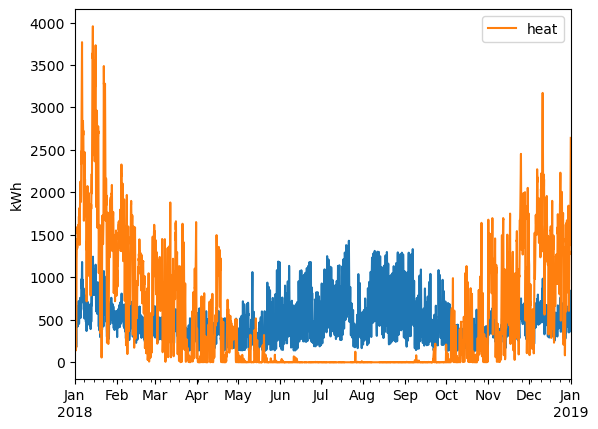

In [35]:
fig, ax = plt.subplots()
res_elec.resample('h').mean().sum(axis=1).plot(ax=ax, label='electricity')
res_heat.resample('h').mean().sum(axis=1).plot(ax=ax, legend=True, label='heat')
ax.set_xlabel('')
ax.set_ylabel('kWh')

In [37]:
total_electrified_data = res_elec.resample('h').mean().sum(axis=1)+res_heat.resample('h').mean().sum(axis=1)/4

In [39]:
total_electrified_data.sum()

5266385.120228281

In [5]:
res_elec.resample('h').mean().sum(axis=1).max()

1430.8057224551974

(0.0, 1450.0)

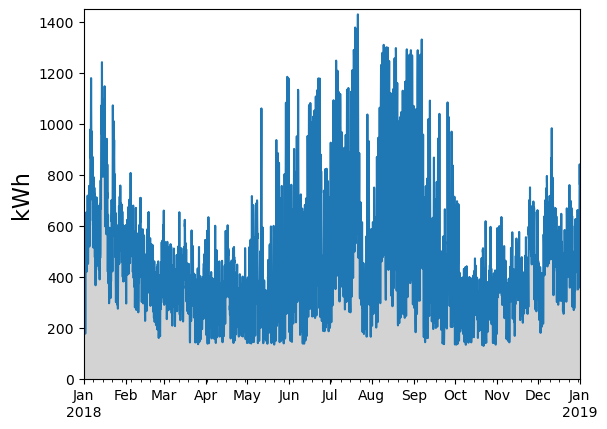

In [6]:
fig, ax = plt.subplots()
res_elec.resample('h').mean().sum(axis=1).plot(ax=ax, label='electricity')
# res_heat.resample('h').mean().sum(axis=1).plot(ax=ax, legend=True, label='heat')
res_elec.resample('h').mean().sum(axis=1).plot.area(ax=ax, lw=0, color='lightgray')
ax.set_xlabel('')
ax.set_ylabel('kWh', fontsize=16)
ax.set_ylim(0, 1450)

Text(0.5, 1.0, 'Average Day')

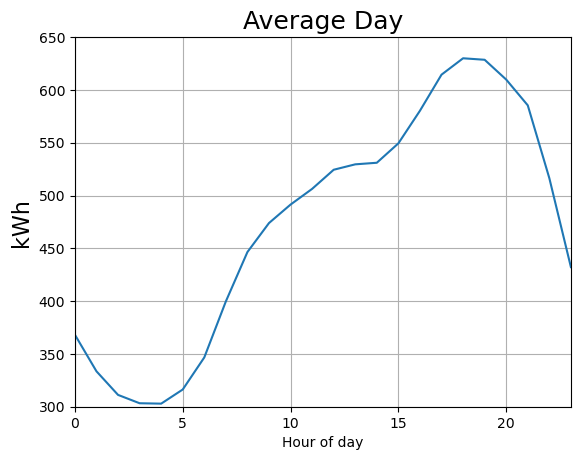

In [7]:
fig, ax = plt.subplots()
res_elec.sum(axis=1).groupby(res_elec.index.hour).mean().plot(ax=ax)
ax.grid(zorder=0)
ax.set_xlim(0,23)
ax.set_ylim(300,650)
ax.set_ylabel("kWh", fontsize=16)
ax.set_xlabel('Hour of day')
ax.set_title('Average Day', size=18)


In [8]:
res_elec.resample('h').mean().sum(axis=1).sum() / (6079*8760*0.18)

0.4315674125864762

In [9]:
weather = pd.read_csv("../data/timeseries/weather_year.csv", parse_dates=True, index_col=0)

In [10]:
weather.ghi.mean() / weather.ghi.max()

0.16817788689562815

In [11]:
rooftop_solar_energy = (weather.ghi / weather.ghi.max() * 6079)

In [12]:
res_elec_resampled = res_elec.loc['2018'].resample('h').mean().sum(axis=1)

In [13]:
res_elec_resampled

timestamp
2018-01-01 00:00:00    734.275500
2018-01-01 01:00:00    319.253001
2018-01-01 02:00:00    206.265092
2018-01-01 03:00:00    200.158683
2018-01-01 04:00:00    214.710827
                          ...    
2018-12-31 19:00:00    756.661431
2018-12-31 20:00:00    799.025894
2018-12-31 21:00:00    814.918117
2018-12-31 22:00:00    842.407166
2018-12-31 23:00:00    790.741970
Freq: H, Length: 8760, dtype: float64

In [14]:
rooftop_solar_energy

2018-01-01 00:00:00    0.0
2018-01-01 01:00:00    0.0
2018-01-01 02:00:00    0.0
2018-01-01 03:00:00    0.0
2018-01-01 04:00:00    0.0
                      ... 
2018-12-31 19:00:00    0.0
2018-12-31 20:00:00    0.0
2018-12-31 21:00:00    0.0
2018-12-31 22:00:00    0.0
2018-12-31 23:00:00    0.0
Name: ghi, Length: 8760, dtype: float64

<Axes: xlabel='timestamp'>

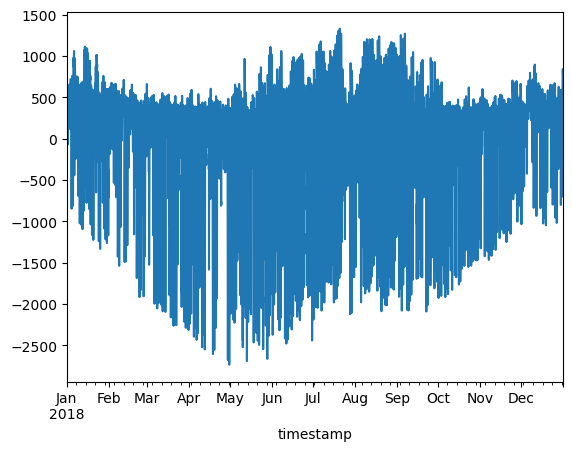

In [15]:
(res_elec_resampled - rooftop_solar_energy/2).plot()

<Axes: xlabel='timestamp'>

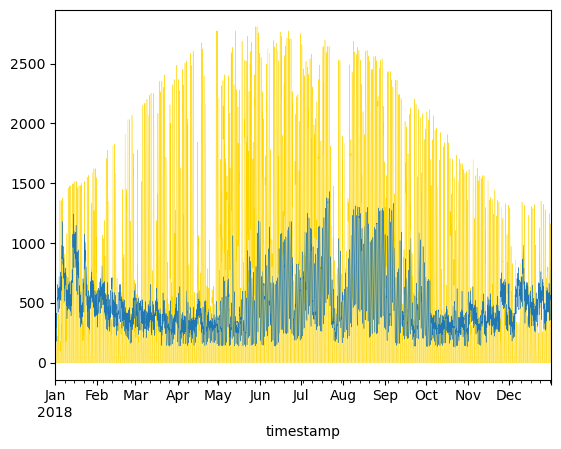

In [16]:
fig, ax = plt.subplots()
(rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum()).plot(ax=ax, color='gold', lw=0.3)
res_elec_resampled.plot(ax=ax, label='electricity', lw=0.3)

<Axes: xlabel='timestamp'>

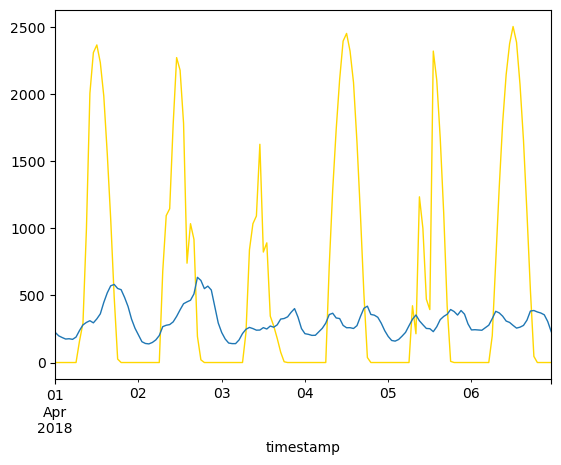

In [17]:
fig, ax = plt.subplots()
(rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum())[24*30*3:24*32*3].plot(ax=ax, color='gold', lw=1)
res_elec_resampled[24*30*3:24*32*3].plot(ax=ax, label='electricity', lw=1)

In [18]:
def calculate_battery_needs(dataframe):
    df = dataframe.copy()
    # calculate max discharge power
    max_storage_power = df['net_load'].max()
    
    # calculate max storage duration
    df['grp'] = df['net_load'].gt(0).astype(int).diff().abs().cumsum().fillna(0)
    df_grouped = df.groupby(by='grp').sum()
    df_grouped['battery_duration'] = df_grouped['net_load']/max_storage_power
    
    max_storage_duration = df_grouped['battery_duration'].max()
    
    return max_storage_power, max_storage_duration

In [40]:
# rooftop_solar_energy = rooftop_solar_energy/rooftop_solar_energy.sum() * res_elec_resampled.sum()
rooftop_solar_energy = rooftop_solar_energy/rooftop_solar_energy.sum() * total_electrified_data.sum()

In [41]:
rooftop_solar_energy.max()

3574.700141052983

In [26]:
net_load = rooftop_solar_energy.to_frame()
net_load['net_load'] = res_elec_resampled - net_load['ghi']

In [28]:
calculate_battery_needs(net_load)

(1331.4884367473771, 34.817758877371986)